In [44]:
import warnings
warnings.filterwarnings("ignore")


 ## Setting Up the Environment and Loading Pre-trained Models
# 
 This initial cell is crucial for setting up the project. It imports all the necessary libraries for data manipulation, machine learning, and visualization. We're loading `pandas` for data handling, `sklearn` modules for classification, scaling, and metrics, `matplotlib` and `ConfusionMatrixDisplay` for plotting, and `joblib` for loading pre-trained models. The custom module `models_and_utils.tree_utils` is also imported, indicating the use of specific utility functions related to decision trees.
# 

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import cm
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from models_and_utils.tree_utils import *
import pandas as pd
import joblib
import plotly.express as px




## Loading Dataset and Pre-trained Assets

This cell loads the core dataset for our recommendation system, which is a subset of Spotify tracks specifically curated for MPB, Rock, and Death Metal genres. Importantly, it also loads pre-trained `MinMaxScaler` and `LabelEncoder` objects, as well as the `best_tree` (our pre-trained Decision Tree Classifier). These pre-trained assets ensure consistency in data transformation and model application, allowing us to directly apply the learned patterns without re-training.



In [46]:
df = pd.read_csv("Data for Modeling/MPBROCKMETAL_KGsubset.csv")
scaler = joblib.load("scaler_encoder/scaler.pkl")
label_encoder = joblib.load("scaler_encoder/label_encoder.pkl") 
best_tree = joblib.load("models_and_utils/best_tree.pkl")


## Cleaning Redundant Columns
 This cell performs a quick data cleaning step by removing two "Unnamed" columns. These columns are often generated during CSV saving and loading operations and are usually redundant, adding no value to our analysis or model. Removing them ensures our DataFrame is clean and ready for processing.



In [47]:
del df["Unnamed: 0"]
del df["Unnamed: 0.1"]

In [48]:
df.iloc[:,4:21]

popularity  duration_ms  explicit  danceability  energy  key  loudness  \
0             66       151565     False         0.765   0.497    1    -7.806   
1             65        89293     False         0.720   0.422    1   -13.338   
2             49       259066     False         0.632   0.651    7    -8.658   
3             49       216446     False         0.610   0.420    4   -10.889   
4             50       273906     False         0.580   0.330    7   -13.703   
...          ...          ...       ...           ...     ...  ...       ...   
2995          20        91866     False         0.474   0.993    1    -5.850   
2996           0       227616     False         0.370   0.993    7    -4.465   
2997          21       162973      True         0.307   0.976    2    -3.552   
2998          22       135893      True         0.362   0.994    6    -1.722   
2999          22       206973     False         0.260   0.994   10    -5.291   

      mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0        0       0.0402      0.492000          0.366000    0.1430   0.4570   
1        0       0.0690      0.474000          0.084700    0.1550   0.5460   
2        0       0.0401      0.756000          0.000004    0.7260   0.6520   
3        0       0.0462      0.815000          0.000000    0.1230   0.5530   
4        1       0.0295      0.596000          0.000001    0.0849   0.3730   
...    ...          ...           ...               ...       ...      ...   
2995     1       0.1270      0.000432          0.030100    0.3380   0.1550   
2996     1       0.1310      0.000078          0.006220    0.1270   0.0398   
2997     0       0.2790      0.000033          0.010600    0.3110   0.4880   
2998     1       0.1260      0.038000          0.000268    0.3600   0.4540   
2999     0       0.0909      0.000006          0.704000    0.0958   0.3600   

        tempo  time_signature  track_genre  
0     112.195               4          mpb  
1     112.219               4          mpb  
2     119.567               4          mpb  
3      96.313               4          mpb  
4     136.408               4          mpb  
...       ...             ...          ...  
2995  128.239               4  death-metal  
2996  103.052               4  death-metal  
2997   83.527               4  death-metal  
2998  103.668               4  death-metal  
2999  145.913               4  death-metal  

[3000 rows x 16 columns]

## Defining Core Functions for Decision Tree Prediction and Evaluation

# This section defines two key functions:

 - **`pDecisionTree(Xdata, ydata)`**: This function takes features (`Xdata`) and true labels (`ydata`) as input. It first scales the new `Xdata` using the pre-loaded `scaler` to ensure consistency with how the `best_tree` was trained. Then, it transforms the `ydata` (track genres) into numerical labels using the pre-loaded `label_encoder`. Finally, it uses the `best_tree` to make predictions on the scaled data and returns the scaled features, predictions, encoded true labels, and class labels. This function is crucial for applying our trained genre classification model.

 - **`getAccuracy(y_pred, y_true_encoded, class_labels)`**: This function calculates and prints the `accuracy_score` between the predicted and true encoded labels. More importantly, it generates and displays a `confusion_matrix` using `ConfusionMatrixDisplay`. The confusion matrix is a powerful tool to visually assess the performance of our classification model, showing how many instances of each genre were correctly or incorrectly classified. The `xticks_rotation=45` ensures the genre labels are readable on the plot.

- **`add_encoded_labels_to_df(y_true_encoded, df)`**: This utility function merges the `y_true_encoded` (numerical representations of track genres) back into the original DataFrame. This is useful for later analysis, allowing us to easily access the encoded genre information alongside other track features.


In [49]:

def pDecisionTree(Xdata, ydata):
    feature_names = Xdata.columns

    X_new_scaled = scaler.transform(Xdata)
    X_new = pd.DataFrame(X_new_scaled, columns=feature_names)
    y_true_encoded = label_encoder.transform(ydata)
    class_labels = label_encoder.classes_

    tree_pred = best_tree.predict(X_new)


    return X_new,tree_pred, y_true_encoded, class_labels 

def getAccuracy(y_pred, y_true_encoded, class_labels):
    acc = accuracy_score(y_true_encoded, y_pred)
    print(f"Accuracy: {acc:.4f}")
    cm = confusion_matrix(y_true_encoded, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(xticks_rotation=45, cmap='Blues')
    

def add_encoded_labels_to_df(y_true_encoded, df):
    df_y_encoded = pd.DataFrame({"track_genre_encoded": y_true_encoded})
    df_combined = pd.merge(df, df_y_encoded, left_index=True, right_index=True)
    return df_combined

## Executing Decision Tree Prediction and Evaluating Accuracy

 In this cell, we first prepare the input data for our decision tree. `Xs` is created by selecting specific feature columns (from index 4 to 18) from the main DataFrame, representing the audio features of the tracks. `y` is set to the `track_genre` column, which is our target variable.

Then, we call `pDecisionTree` to perform the prediction, obtaining the scaled features (`t`), the tree's predictions (`x`), the encoded true labels (`y`), and the class labels (`z`).

 Next, `add_encoded_labels_to_df` integrates the encoded genre labels back into the original DataFrame, creating `df_encoded_genr`. This DataFrame now contains a new column with the numerical representation of the genres.

Finally, `getAccuracy` is called to evaluate the model's performance by comparing the predictions (`x`) against the true encoded labels (`y`), using the class labels (`z`) for proper visualization of the confusion matrix. This step provides insights into how well our decision tree classifies the genres.


Accuracy: 0.9730


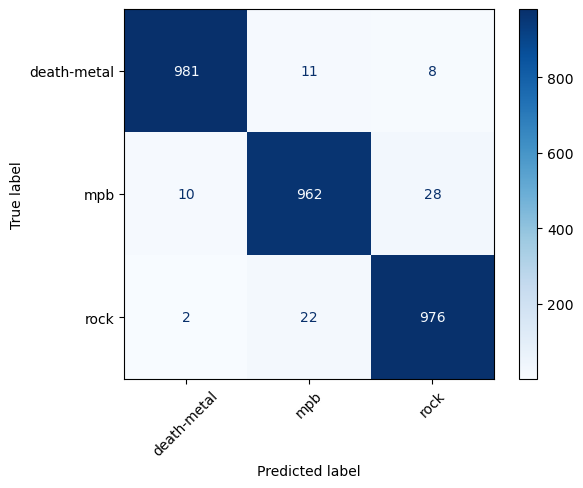

In [50]:
Xs = df.iloc[:, 4:18]
y = df["track_genre"]

t, x, y,z= pDecisionTree(Xs,y)
df_encoded_genr = add_encoded_labels_to_df(y, df)
getAccuracy(x,y,z)

 ## Mapping Tracks to Leaf Nodes
This cell utilizes the `get_samples_leaf_nodes` function (presumably from `models_and_utils.tree_utils`) to assign each track in our dataset to a specific leaf node of the `best_tree`.
 
The `best_tree` is a pre-trained decision tree classifier that segments our data based on track features into distinct groups (leaf nodes). By associating each track with its corresponding leaf node, we're effectively creating genre-based segments. This is a crucial step for our recommendation engine, as it allows us to identify tracks that are similar in terms of their features and thus fall into the same "pattern" determined by the decision tree. This segmentation forms the foundation for finding recommendations within similar genre clusters.


In [51]:
df_with_leaf_nodes =  get_samples_leaf_nodes(best_tree, t)


## Consolidating Data and Preparing for Analysis

 This cell merges the DataFrame containing the leaf node assignments (`df_with_leaf_nodes`) with the original `df`. This creates `df_completo`, a comprehensive DataFrame that includes all original track information along with the newly assigned `leaf_node` for each track.

Then, a `lista_colunas` is defined to select and reorder a specific subset of columns from `df_completo`. This selection prioritizes relevant track metadata (like ID, artists, name, popularity), audio features, and the `leaf_node` and `track_genre` information, making the DataFrame more manageable and focused for subsequent recommendation logic.

Finally, `df_completo` is reset, ensuring a clean index for further processing. This step is essential for having a well-structured dataset that combines both original track details and the derived leaf node information, setting the stage for PCA and recommendation generation.
 

In [52]:
df_completo = pd.merge(df_with_leaf_nodes,df, left_index=True, right_index=True)
lista_colunas =  ['track_id', 'artists', 'album_name', 'track_name','popularity', 'duration_ms', 'explicit', 'danceability', 'leaf_node',
'energy','key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo', 'time_signature', 'track_genre']
       
df_completo = df_completo[lista_colunas]

df_completo = df_completo.reset_index()

## Implementing PCA and Recommendation Logic

This cell defines three critical functions for generating recommendations:

- **`addPCA(df, feature_start=5, feature_end=19, n_components=2)`**: This function takes a DataFrame and applies Principal Component Analysis (PCA). It extracts specified feature columns, scales them using the pre-loaded `scaler`, and then reduces their dimensionality to `n_components` (defaulting to 2). The resulting principal components (`PC1` and `PC2`) are added as new columns to the DataFrame. PCA helps in visualizing high-dimensional data in a lower-dimensional space while retaining most of the variance, making it easier to identify similarities between tracks.

- **`getLeafBased2DInfo(df, pc_cols=['PC1', 'PC2'], leaf_col='leaf_node')`**: This function groups the DataFrame by the `leaf_node` (the segment determined by the decision tree). Within each leaf node group, it sorts the tracks based on their `PC1` and `PC2` values. This sorting is crucial for our "directional" recommendation strategy, as it orders tracks within a leaf node based on their similarity in the PCA space.

- **`add_directional_recommendations(df, leaf_node_groups, id_col='index', k=5)`**: This is the core recommendation logic. For each track in the DataFrame, it identifies its `leaf_node`. Based on the track's position within the sorted PCA values of its leaf node group, it recommends `k` (defaulting to 5) other tracks. If a track is in the first half of the sorted list, it recommends tracks appearing after it; otherwise, it recommends tracks appearing before it. This "directional" approach ensures that recommendations are spatially close in the PCA-reduced feature space within the same genre-based segment. The recommendations are stored as a list of track indices in a new 'Recommendations' column.

- Finally, these functions are called in sequence: first, `addPCA` is applied to `df_completo` to add `PC1` and `PC2` columns. Then, `getLeafBased2DInfo` processes this DataFrame to get the sorted leaf node groups. Lastly, `add_directional_recommendations` generates the actual recommendations based on these sorted groups, storing them in `directional_recommendations`.


In [53]:



def addPCA(df, feature_start=5, feature_end=19, n_components=2):
    df = df.copy()
    X = df.iloc[:, feature_start:feature_end]
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA(n_components=n_components)
    components = pca.fit_transform(X_scaled)
    
    df['PC1'] = components[:, 0]
    df['PC2'] = components[:, 1]
    
    return df


def getLeafBased2DInfo(df, pc_cols=['PC1', 'PC2'], leaf_col='leaf_node'):
    grouped = df.groupby(leaf_col)
    
    leaf_node_groups = {}
    for leaf, group in grouped:
        sorted_group = group.sort_values(by=pc_cols, ascending=[True, True])
        leaf_node_groups[leaf] = sorted_group

    return grouped, leaf_node_groups

        
    
def add_directional_recommendations(df, leaf_node_groups, id_col='index', k=5):
    df = df.copy()
    df['Recommendations'] = None  

    for leaf, sorted_leaf_df in leaf_node_groups.items():
        sorted_leaf_df = sorted_leaf_df.reset_index(drop=True)
        leaf_len = len(sorted_leaf_df)

        for idx, row in sorted_leaf_df.iterrows():
            song_id = row[id_col]

            if idx < leaf_len / 2:
                recs = sorted_leaf_df.iloc[idx + 1:][id_col].tolist()
            else:
                recs = sorted_leaf_df.iloc[:idx][id_col].tolist()

            if k is not None:
                recs = recs[:k]

            df.at[df[df[id_col] == song_id].index[0], 'Recommendations'] = recs

    return df

            
        
    
df_completo= addPCA(df_completo)
a,b= getLeafBased2DInfo(df_completo)
directional_recommendations = add_directional_recommendations(df_completo,b)



df_completo

index                track_id                 artists  \
0         0  6g2BiiVQqY5v1S4HIrM54F        Rodrigo Amarante   
1         1  6Dc2tCivms1s2X9myWe4ni        Rodrigo Amarante   
2         2  76HOOcFt3lKVdScmoScfz1                  Djavan   
3         3  4crctLJMKJekuqQ7cQLpHV  Nicolas Candido;Olívia   
4         4  0XXwP0EmpOEqWxcL9aSreJ               Fábio Jr.   
...     ...                     ...                     ...   
2995   2995  78adEMnfn1XolaOh2QAjZS                Brujeria   
2996   2996  53c9YHuifgAWJoqgPOgPUn               Unleashed   
2997   2997  6us7QqYJGMGZqej8dKCFGC          Bury Your Dead   
2998   2998  5l5XKQmo9M0XHdNAPddq0i                   Surra   
2999   2999  1eUrfmvVOuy7RsS11Kz74Q         Toxic Holocaust   

                                             album_name  \
0     Tuyo (Narcos Theme) [Extended Version] [A Netf...   
1     Tuyo (Narcos Theme) [A Netflix Original Series...   
2                                      Djavan "Ao Vivo"   
3                            Apaga a Luz (feat. Olívia)   
4                                             Fabio Jr.   
...                                                 ...   
2995                                         Brujerizmo   
2996                                Gods of Death Metal   
2997                                  Cover Your Tracks   
2998                                       Bica na Cara   
2999                            An Overdose of Death...   

                                             track_name  popularity  \
0     Tuyo (Narcos Theme) [Extended Version] - A Net...          66   
1     Tuyo (Narcos Theme) - A Netflix Original Serie...          65   
2                                        Azul (Ao Vivo)          49   
3                            Apaga a Luz (feat. Olívia)          49   
4                                      Pareço um Menino          50   
...                                                 ...         ...   
2995                            Laboratorio Cristalitos          20   
2996                          Long Before Winter's Call           0   
2997                                Mission: Impossible          21   
2998                                     Vida de Babaca          22   
2999                       Feedback, Blood & Distortion          22   

      duration_ms  explicit  danceability  leaf_node  ...  speechiness  \
0          151565     False         0.765        210  ...       0.0402   
1           89293     False         0.720        210  ...       0.0690   
2          259066     False         0.632        163  ...       0.0401   
3          216446     False         0.610        158  ...       0.0462   
4          273906     False         0.580        158  ...       0.0295   
...           ...       ...           ...        ...  ...          ...   
2995        91866     False         0.474        125  ...       0.1270   
2996       227616     False         0.370         21  ...       0.1310   
2997       162973      True         0.307        125  ...       0.2790   
2998       135893      True         0.362        209  ...       0.1260   
2999       206973     False         0.260        125  ...       0.0909   

      acousticness  instrumentalness  liveness  valence    tempo  \
0         0.492000          0.366000    0.1430   0.4570  112.195   
1         0.474000          0.084700    0.1550   0.5460  112.219   
2         0.756000          0.000004    0.7260   0.6520  119.567   
3         0.815000          0.000000    0.1230   0.5530   96.313   
4         0.596000          0.000001    0.0849   0.3730  136.408   
...            ...               ...       ...      ...      ...   
2995      0.000432          0.030100    0.3380   0.1550  128.239   
2996      0.000078          0.006220    0.1270   0.0398  103.052   
2997      0.000033          0.010600    0.3110   0.4880   83.527   
2998      0.038000          0.000268    0.3600   0.4540  103.668   
2999      0.000006          0.704000    0.0958   0

## Interactive PCA Visualization with Recommendations

This cell defines the `interactive_pca_plot` function, which is responsible for visualizing our recommendation engine's results using an interactive Plotly scatter plot.

**Function Breakdown:**

- **Filtering by Genre:** The function first filters the main DataFrame to include only tracks of a specified `genre`, creating `genre_df`. This allows us to analyze recommendations within a specific genre context.
- **PCA Transformation:** It then performs PCA on the audio features (`features`) of the `genre_df`. Crucially, the `pca` object is fitted *only* on the features of the selected genre. This means the principal components (PC1 and PC2) are optimized to represent the variance within that specific genre, providing a more relevant 2D projection.
- **Creating Plotting DataFrame (`pca_df`):** A new DataFrame `pca_df` is constructed from the PCA-transformed data, including track names, original indices, genres, and a `type` column initially set to "original."
 - **Adding Recommendations to Plotting Data:** This is a key part. For each original track in `genre_df`, its associated recommendations (from the `Recommendations` column generated earlier) are retrieved. For *each recommended track*, its original features are transformed using the *same PCA object* that was fitted on the `genre_df`. This ensures consistency in the PCA projection. The recommended tracks are then added to `pca_df` with their `type` set to "recommendation" and an `origin` column linking them back to the original track that generated the recommendation.
- **Color Mapping:** Unique colors are assigned to each *original* track, and these colors are then applied to both the original track and all its recommendations. This visual link makes it easy to see which recommendations belong to which original song.
- **Plotting with Plotly Express:** `plotly.express.scatter` is used to create the interactive plot.
     `x="PC1"` and `y="PC2"` define the axes.
     `color="color"` applies the defined color scheme.      `hover_data` is configured to show detailed information when hovering over a point, such as `track_name`, original `index`, `track_genre`, `origin` (the index of the song that generated the recommendation), `type` (original or recommendation), and `leaf_node`. This rich hover information is essential for understanding the recommendations.
- **Plot Customization:** `fig.update_traces` adjusts marker size and opacity, and `showlegend=False` is used because colors represent individual songs rather than categories. `fig.update_layout` sets the title for the plot.
- **Displaying the Plot:** `fig.show()` displays the interactive plot.
 
_This function allows us to visually verify that recommended tracks are indeed clustered near their originating tracks in the PCA space, thereby demonstrating the effectiveness of our recommendation engine in identifying similar tracks within the same genre and decision tree segment._



In [54]:
def interactive_pca_plot(df, genre):
    genre_df = df[df["track_genre"] == genre].copy()

    # Use precomputed PC1 and PC2
    pca_df = genre_df[["PC1", "PC2", "track_name", "track_genre", "leaf_node"]].copy()
    pca_df["index"] = genre_df.index
    pca_df["origin"] = genre_df.index
    pca_df["type"] = "original"

    # Add recommendations
    for idx in genre_df.index:
        recommendations = df.loc[idx, "Recommendations"]
        for rec_idx in recommendations:
            rec_row = df.loc[rec_idx]
            pca_df = pd.concat([
                pca_df,
                pd.DataFrame([{
                    "PC1": rec_row["PC1"],
                    "PC2": rec_row["PC2"],
                    "track_name": rec_row["track_name"],
                    "track_genre": rec_row["track_genre"],
                    "leaf_node": rec_row["leaf_node"],
                    "index": rec_idx,
                    "origin": idx,
                    "type": "recommendation"
                }])
            ], ignore_index=True)

    # Color by original track
    unique_origins = pca_df[pca_df["type"] == "original"]["origin"].unique()
    color_map = {
        idx: px.colors.qualitative.Safe[i % len(px.colors.qualitative.Safe)]
        for i, idx in enumerate(unique_origins)
    }
    pca_df["color"] = pca_df["origin"].map(color_map)

    # Plot
    fig = px.scatter(
        pca_df,
        x="PC1",
        y="PC2",
        color="color",
        hover_data={
            "track_name": True,
            "index": True,
            "track_genre": True,
            "origin": True,
            "type": True,
            "leaf_node": True,
            "color": False,
            "PC1": False,
            "PC2": False
        }
    )
    fig.update_traces(marker=dict(size=8, opacity=0.8), showlegend=False)
    fig.update_layout(title=f"PCA of {genre} Tracks + Recommendations (Hover for details)")
    fig.show()

    return pca_df


## Visualizing Recommendations for "MPB" Genre
This cell calls the `interactive_pca_plot` function specifically for the MPB genre. It creates an interactive scatter plot showing original MPB tracks and their recommendations in a 2D PCA space. This visualization clearly demonstrates how the recommendation engine groups and suggests similar MPB songs based on their shared audio features and decision tree segmentation.

In [55]:
interactive_pca_plot(directional_recommendations, "mpb")

PC1       PC2                                         track_name  \
0     0.425583  0.569661  Tuyo (Narcos Theme) [Extended Version] - A Net...   
1     0.608559  0.517393  Tuyo (Narcos Theme) - A Netflix Original Serie...   
2     0.607616  0.223800                                     Azul (Ao Vivo)   
3     0.714773  0.216299                         Apaga a Luz (feat. Olívia)   
4     0.589065  0.171936                                   Pareço um Menino   
...        ...       ...                                                ...   
5768 -0.206650  0.356887                                 Os Anjos - Ao Vivo   
5769 -0.126887  0.257158                                Envelheço Na Cidade   
5770 -0.098064  0.353794                                            Timidez   
5771  0.569006  0.394348                                   Vento No Litoral   
5772  0.832041  0.328889                          Canto de Oxum / Inscrição   

     track_genre  leaf_node  index  origin            type               color  
0            mpb        210      0       0        original  rgb(136, 204, 238)  
1            mpb        210      1       1        original  rgb(204, 102, 119)  
2            mpb        163      2       2        original  rgb(221, 204, 119)  
3            mpb        158      3       3        original    rgb(17, 119, 51)  
4            mpb        158      4       4        original    rgb(51, 34, 136)  
...          ...        ...    ...     ...             ...                 ...  
5768         mpb        165    690     998  recommendation    rgb(136, 34, 85)  
5769         mpb        165    687     998  recommendation    rgb(136, 34, 85)  
5770         mpb        165    442     998  recommendation    rgb(136, 34, 85)  
5771         mpb        149    300     999  recommendation     rgb(102, 17, 0)  
5772         mpb        149    151     999  recommendation     rgb(102, 17, 0)  

[5773 rows x 9 columns]

## Visualizing Recommendations for "Rock" Genre

This cell calls the `interactive_pca_plot` function specifically for the "rock" genre. It generates an interactive scatter plot showing original rock tracks and their respective recommendations in a 2D PCA space. This visualization is crucial for understanding how our recommendation engine identifies similar rock tracks based on their audio features and decision tree segmentation, allowing for a visual assessment of the recommendation quality within this genre.
 

In [56]:
interactive_pca_plot(directional_recommendations, "rock")

PC1       PC2               track_name track_genre  leaf_node  \
0    -0.022633  0.307768         Sex, Drugs, Etc.        rock        111   
1     0.355461  0.707150         I Wanna Be Yours        rock        210   
2     0.064737  0.436701          Sweater Weather        rock        210   
3     0.273440  0.543625          I Ain't Worried        rock        210   
4     0.627428  0.310213  Nasha (Equals Sessions)        rock        210   
...        ...       ...                      ...         ...        ...   
5845 -0.103838 -0.421766   Bigmouth Strikes Again        rock         44   
5846 -0.098303 -0.472497       Livin' On A Prayer        rock         44   
5847 -0.097167 -0.466736       Livin' On A Prayer        rock         44   
5848 -0.096031 -0.460975       Livin' On A Prayer        rock         44   
5849 -0.089895 -0.407700       Hell Or High Water        rock         44   

      index  origin            type               color  
0      1000    1000        original  rgb(136, 204, 238)  
1      1001    1001        original  rgb(204, 102, 119)  
2      1002    1002        original  rgb(221, 204, 119)  
3      1003    1003        original    rgb(17, 119, 51)  
4      1004    1004        original    rgb(51, 34, 136)  
...     ...     ...             ...                 ...  
5845   1397    1999  recommendation     rgb(102, 17, 0)  
5846   1290    1999  recommendation     rgb(102, 17, 0)  
5847   1287    1999  recommendation     rgb(102, 17, 0)  
5848   1295    1999  recommendation     rgb(102, 17, 0)  
5849   1379    1999  recommendation     rgb(102, 17, 0)  

[5850 rows x 9 columns]

## Visualizing Recommendations for "Death Metal" Genre

Similar to the previous cell, this one invokes the `interactive_pca_plot` function, but this time for the "death-metal" genre. It renders an interactive scatter plot that displays the original death metal tracks and their corresponding recommendations. This plot provides a visual confirmation of the recommendation engine's ability to cluster and suggest similar tracks within the death metal genre based on their PCA-reduced feature similarity and decision tree leaf node assignments.


In [57]:
interactive_pca_plot(directional_recommendations, "death-metal")

PC1       PC2             track_name  track_genre  leaf_node  \
0    -0.286999  0.279830        Our Time Is Now  death-metal        133   
1    -0.304759  0.229013   Hallowed Be Thy Name  death-metal        133   
2     0.446765  0.332925     Soldier of Fortune  death-metal        186   
3    -0.213837  0.153055     You Only Live Once  death-metal        125   
4    -0.343162  0.204499      Voice of the Soul  death-metal        109   
...        ...       ...                    ...          ...        ...   
5880 -0.512747  0.138689              Svartberg  death-metal        125   
5881 -0.507241  0.107340    Beneath Dying Skies  death-metal        125   
5882 -0.505965 -0.021649                Mkultra  death-metal        125   
5883 -0.504624  0.303915       L'enfant sauvage  death-metal        125   
5884 -0.502901  0.209660  Rid You of Your Flesh  death-metal        125   

      index  origin            type               color  
0      2000    2000        original  rgb(136, 204, 238)  
1      2001    2001        original  rgb(204, 102, 119)  
2      2002    2002        original  rgb(221, 204, 119)  
3      2003    2003        original    rgb(17, 119, 51)  
4      2004    2004        original    rgb(51, 34, 136)  
...     ...     ...             ...                 ...  
5880   2669    2999  recommendation     rgb(102, 17, 0)  
5881   2394    2999  recommendation     rgb(102, 17, 0)  
5882   2733    2999  recommendation     rgb(102, 17, 0)  
5883   2070    2999  recommendation     rgb(102, 17, 0)  
5884   2559    2999  recommendation     rgb(102, 17, 0)  

[5885 rows x 9 columns]